In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load CSV
d0=pd.read_csv('D:/Data_Practice/mnist_train.csv')
#d0.head()#top 5 rows
print(d0.shape) #(60000,785)
# 60k data points and 784 features and 1 label column(0,1,2,.. ..,9)
#We slice d0 to seperate label and 784 features
l=d0['label']
d=d0.drop('label',axis=1)#Drop label column which is in column(axis=1)
#Now l contains label column and d contains only data
print(l)
print(d)

(60000, 785)
0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64
       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0        0    0    0    0    0    0    0    0    0     0  ...      0      0   
1        0    0    0    0    0    0    0    0    0     0  ...      0      0   
2        0    0    0    0    0    0    0    0    0     0  ...      0      0   
3        0    0    0    0    0    0    0    0    0     0  ...      0      0   
4        0    0    0    0    0    0    0    0    0     0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
59995    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59996    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59997    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59998    0    0    0    0    0    0

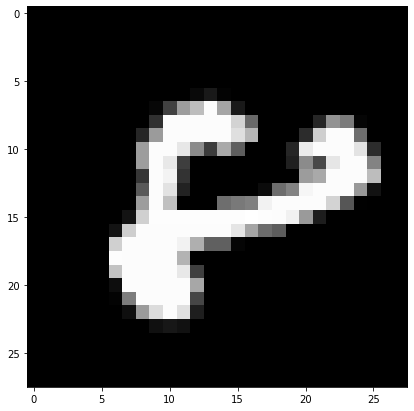

8


In [3]:
#We plot the random data points an image and compare with label value
plt.figure(figsize=(7,7))#plot figure with size 7x7
indx=7891
dtpt_val = d.iloc[indx].to_numpy().reshape(28,28) #getting 100th dtpt->to matrix->to 28x28 shape matrix
#Now we plot this datapoint
plt.imshow(dtpt_val,interpolation='None',cmap='gray')#imshow func shows images with color map ->grayscale
plt.show()#pict rep of the datapoint looks like number
print(l[indx])#exact num at index

In [42]:
#Here we do for whole dataset -->60k
#pre-processing
from sklearn.preprocessing import StandardScaler
#print(d)
stn_data = StandardScaler().fit_transform(d)
stn_data.shape

(60000, 784)

In [43]:
#We calc cov matrix
cov_mat = np.matmul(stn_data.T,stn_data) #(784x60k*60kx784)
#cov_mat

In [44]:
#We calc eigen values and vectors
from scipy.linalg import eigh
values,vectors = eigh(cov_mat,eigvals=(782,783))#top two highest values are 782 and 783 as eigvals holds all vals in ascending order
print(values.shape)
print(vectors.shape)
vectors = vectors.T
vectors.shape 

(2,)
(784, 2)


(2, 784)

In [45]:
#Now we project xi s on V1 and V2(2D) we get xi` (V*xT)
new_coordinates = np.matmul(vectors,stn_data.T)
new_coordinates.shape #2x60000

#Now we computed new xi' values which are on new axes with the help of PCA formula (Xi' = VT*Xi) -->We did XiT to match the dim((2x784)*(784x60000))


(2, 60000)

In [48]:
# Now we merge label data (Y) with our X data
l=np.asarray(l)
l=l.reshape(60000,1)
print("New cordinates shape",new_coordinates.shape)
print("label shape:",l.shape)
new_data = np.hstack((new_coordinates.T,l))
new_data.shape
#Here l is a column vector it has 60k values/cols and they get added as new row so that 3 rows 60k cols and then transpose--->(60k x 3)
#Hence our output

New cordinates shape (2, 60000)
label shape: (60000, 1)


(60000, 3)

In [12]:
#Now we make a dataframe using pandas and then...
#We plot this new co-ord data new using sb.FG
dt_frame=pd.DataFrame(data=new_data,columns=('1st_principle','2nd_principle','label')) #We are conv np nd array to DF
dt_frame.head()

,1st_principle,2nd_principle,label
0,-4.814790,-0.922159,5.0
1,-7.754403,8.708977,0.0
2,9.431338,2.328389,4.0
3,-3.746318,-6.582173,1.0
4,3.133297,-5.183251,9.0


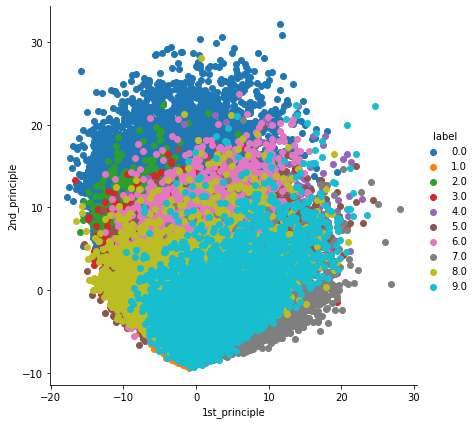

In [13]:
import seaborn as sb
g=sb.FacetGrid(dt_frame,hue='label',height=6)
g.map(plt.scatter,'1st_principle','2nd_principle')
g.add_legend()
plt.show() #shows 2D representation of labels(0-->9) with hue after dim reduction from 784 to 2 dim
#As we can see most of the dots are merged and spread all over not well-seperated

In [24]:
#Now we get sama analysis using PCA method provided by sklearn--->
from sklearn import decomposition
pca = decomposition.PCA() #pca is object for PCA() here
pca.n_components= #2 dim we want
pca_data = pca.fit_transform(stn_data)  #We give col-std data as input to PCA it calcs cov_mat(s),eigen vales,vectors and creates new data on new axes and gives in one line
pca_data.shape #(60000x2) It calc everything and gave as new data with 2dim from 784 dim
#One more thing here compared to prev way features/cols interchange so we get tilted graph when compared to prev plot
#See df.head for both data we can get it

(60000, 2)

(60000, 3)
   1st_principle  2nd_principle  label
0      -0.922177      -4.814769    5.0
1       8.708992      -7.754185    0.0
2       2.328265       9.431951    4.0
3      -6.582222      -3.746733    1.0
4      -5.183243       3.133402    9.0


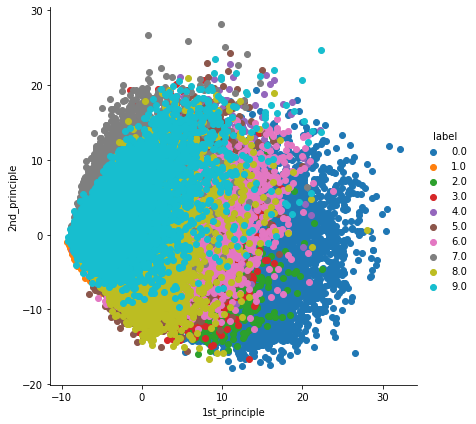

In [25]:
#Now we plot this pca_data by doing stacking and all
new_pca = np.vstack((pca_data.T,l)).T
print(new_pca.shape)
dt_frame=pd.DataFrame(data=new_pca,columns=('1st_principle','2nd_principle','label'))
print(dt_frame.head())
g=sb.FacetGrid(dt_frame,hue='label',height=6)
g.map(plt.scatter,'1st_principle','2nd_principle')
g.add_legend()
plt.show() 